# About this liveProject
Wisdom of the crowd is an idea that states the importance of collective opinions. This idea relies on the combination of collective views rather than personal opinions, and it is very likely for you to encounter a practical usage of this methodology nowadays. Let’s say you have a dataset that consists of trust ratings given by the users to each other, and you aim to analyze this dataset in order to identify the most trustworthy and the most suspicious users. This case is a decent representation of how collective opinion can provide insights.

In this liveProject, you will analyze a network dataset (in other words, a graph dataset), visualize it, generate features, and create user clusters based on these derived features. By the end of the project, you will have experience in analyzing network datasets and some introductory knowledge about clustering.

To complete this project, you should prepare the assignments as follows:

1. Reading and examining the trust network dataset in Python
2. Generating feature columns using network functions as preparation for clustering
3. Creating user clusters and interpreting them
4. Visualizing the nodes and edges of the network dataset

# Techniques employed
The techniques in this project can be examined in 4 main groups:

*Python fundamentals to set up the required analysis environment: loops, lists, and dictionaries*

*Python libraries for data operations: pandas*

*Python libraries for clustering: Scikit-learn*

*Python libraries to analyze and visualize network datasets: NetworkX*

# Project outline
This liveProject will be divided into 4 milestones.

1. Reading and Analyzing the Dataset

2. Generating Network Features

3. Creating Clusters

4. Visualizing the Network

In each milestone, the deliverable will be a Python script that shows the progress of the project.

# Dataset
Dataset description: <a href="https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html">Bitcoin OTC trust weighted signed network</a>

Download link: https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz

# Prerequisites
The liveProject is for data practitioners who want to get into network analysis.

TOOLS
Python (basics)
Fundamentals: loops, functions, apply
Pandas: Dataframes, basic feature transformations
NetworkX: Analyzing network data
Scikit-learn
Jupyter notebook (basics)
Build simple Python scripts.

TECHNIQUES
Statistics (basics)
Basic functions: mean, scaling
Clustering
K-means

# Recommended resources
These are resources that are directly referenced throughout the liveProject and can directly impact or expand your understanding of the liveProject’s content.

Data Science Bookcamp by Leonard Apeltsin

The Quick Python Book, Third Edition by Naomi Ceder

Pandas in Action by Boris Paskhaver

Unsupervised Learning with Python by Vaibhav Verdhan

We provide additional resources and tutorials throughout the project. Feel free to use any resources you can find to complete the project. If you run into problems or have questions, refer to the Frequently Asked Questions (FAQs) section.

# Reading and Analyzing the Dataset

##  Objective

Download the Bitcoin OTC network dataset, read it, and prepare an exploratory data analysis.

## Importance to project

This dataset will be our main source in the next milestones, and we will build our features on it.

##  Workflow

Import pandas and date-time libraries

In [5]:
import pandas as pd
import datetime
from datetime import *
from datetime import datetime

Download the dataset from the Stanford Snap website.

Read the file as a pandas DataFrame and change column names to source, target, rating, and time.

In [2]:
df = pd.read_csv('soc-sign-bitcoinotc.csv', names= ["source", "target", "rating", "time"])

In [3]:
df.head()

,source,target,rating,time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


Transform the ‘time’ column into a date-time format. (For transforming, you can use the datetime.fromtimestamp function.)

In [8]:
df['time'] = df['time'].apply(lambda x:datetime.fromtimestamp(x))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  35592 non-null  int64         
 1   target  35592 non-null  int64         
 2   rating  35592 non-null  int64         
 3   time    35592 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.1 MB


Analyze the dataset using the describe function of pandas.

In [9]:
df.describe()

,source,target,rating
count,35592.000000,35592.000000,35592.000000
mean,2353.847269,2417.478254,1.012025
std,1605.771178,1658.232170,3.562094
min,1.000000,1.000000,-10.000000
25%,988.000000,978.000000,1.000000
50%,2125.000000,2178.000000,1.000000
75%,3722.000000,3804.000000,2.000000
max,6000.000000,6005.000000,10.000000


Aggregate the ‘time’ column by weeks and plot the total row counts as a time series graph.

*You can use the resample function of pandas in order to aggregate a date-time column.*

<AxesSubplot:xlabel='time'>

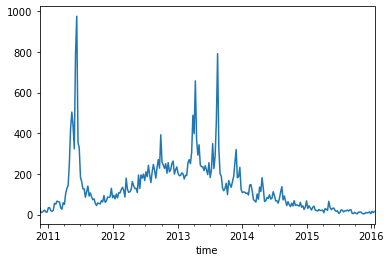

In [12]:
df.resample('1W', on='time')['time'].count().plot()

Aggregate the ‘time’ column by weeks and plot the average ratings as a time series graph.

<AxesSubplot:xlabel='time'>

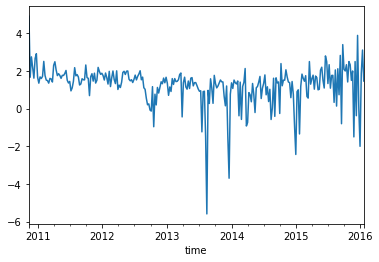

In [14]:
df.resample('1W', on='time')['rating'].mean().plot()

Plot the histogram of ratings.

<AxesSubplot:>

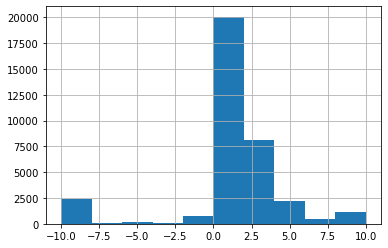

In [52]:
df.rating.plot.hist()

Plot the histogram of average ratings grouped by targeted users.

<AxesSubplot:>

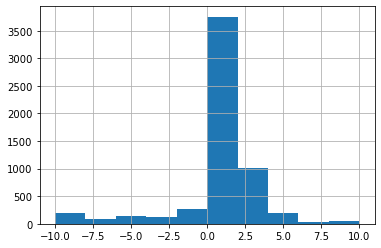

In [54]:
df.groupby(by=df.target).mean()["rating"].hist()

## Full Solution

In [48]:
# Solution Explanation


```
import pandas as pd
import datetime

pd.set_option('display.float_format', lambda x: '%.3f' % x)

data = pd.read_csv('your_path/soc-sign-bitcoinotc.csv', names=['source', 'target', 'rating', 'time'])

data['time'] = data['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

#Table Description
data.describe()

# Historical analysis
data.resample('1W', on='time')['time'].count().plot()
data.resample('1W', on='time')['rating'].mean().plot()

#Histogram of ratings
data['rating'].hist(bins=21)

#Histogram of average ratings
data.groupby('target').mean()['rating'].hist()

SyntaxError: invalid syntax (Temp/ipykernel_11612/1325545361.py, line 4)

# Generating Network Features

## Objective

Create a network object and use it in order to generate features for each user.

## Importance to project

The features that will be generated in this milestone will be the inputs of the clustering model in the next step.

## Workflow

Import the NetworkX library

In [91]:
import networkx as nx

Create a directed graph object using the NetworkX library and add all rows as edges to the graph. Attach the ratings to the edges as weight.

These edges begin at a source node and end at a target node.

In [96]:
# https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
G = nx.from_pandas_edgelist(df=df, source="source", target="target", edge_attr="rating", create_using=nx.DiGraph())

In [97]:
type(G)

networkx.classes.digraph.DiGraph

Print out the total node count in the network object.

In [98]:
print(nx.info(G))

DiGraph with 5881 nodes and 35592 edges


Start generating features in DataFrame.Create a DataFrame as feature_df and add average ratings of targeted users as a first feature. In this DataFrame, each target user will be represented as a row, and they will be the instances of our clustering model in the next milestone.

In [52]:
df.head()

,source,target,rating,time
0,6,2,4,2010-11-08 13:45:11.728360
1,6,5,2,2010-11-08 13:45:41.533780
2,1,15,1,2010-11-08 14:05:40.390490
3,4,3,7,2010-11-08 14:41:17.369750
4,13,16,8,2010-11-08 17:10:54.447460


In [49]:
pd.crosstab(df.target, df.rating)

rating,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10
target,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,96,31,19,11,16,3,8,13,6,23
2,0,0,0,0,0,0,0,0,1,0,15,7,5,2,4,1,1,5,0,0
3,5,0,0,1,0,0,0,1,1,1,3,0,1,0,2,2,3,1,0,0
4,0,0,0,0,0,0,0,0,0,0,19,12,5,2,9,0,2,3,1,1
5,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6002,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6003,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [85]:
average_ratings_by_target = df.groupby(df.target)["rating"].mean()

In [86]:
feature_df = average_ratings_by_target.to_frame()

In [87]:
feature_df

,rating
target,
1,3.544248
2,3.000000
3,-0.285714
4,3.111111
5,2.333333
...,...
5999,1.000000
6002,1.000000
6003,1.000000


In a directed network (or, in other words, in a directed graph), the number of inbound edges to a node are called the in-degree and the number of outbound edges are called the out-degree of a node. In the previous step, we calculated the average ratings of a target user. Let’s call it the just average rating of a user. In this step, calculate the average of inbound users’ average ratings for each target user and add it as a second feature to the feature_df. In the case of no inbound users, assign 0.

You can use the in_degree and out_degree functions of NetworkX in order to calculate them for each user.

In [118]:
# calculate the average of inbound users’ average ratings for each target user

# find all inbound users (the number of inbound edges to a node are called the in-degree)
inbound_users = G.in_degree()  

# find all outbound users (the number of outbound edges are called the out-degree of a node.)
outbound_users = G.out_degree()  

# find their average ratings???

# get the average of their average ratings??? (using stats??)

# add it as a second feature to the feature_df. In the case of no inbound users, assign 0.

As third and fourth features, add the in-degree and out-degree of each target user to feature_df.

In [122]:
feature_df["outbound_users"] = outbound_users

ValueError: Length of values (5881) does not match length of index (5858)

In [121]:
feature_df["inbound_users"] = inbound_users

ValueError: Length of values (5881) does not match length of index (5858)

As a final feature, calculate the page rank value of each target user and add it to the feature_df.

You can use the pagerank_numpy function of NetworkX in order to calculate the page rank value for each user quicker compared to the standard page rank function.

In [123]:
# DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
pr = nx.pagerank_numpy(G) 

C:\Users\Joe\AppData\Local\Temp/ipykernel_13244/398147362.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pr = nx.pagerank_numpy(G)


KeyboardInterrupt: 

In [124]:
# https://stackoverflow.com/questions/13040548/networkx-differences-between-pagerank-pagerank-numpy-and-pagerank-scipy
pr = nx.pagerank(G)

In [127]:
feature_df["page_rank"] = pr

ValueError: Length of values (5881) does not match length of index (5858)

# Full solution

In [ ]:
# Solution Explanation


*partial solution*
```
#Importing the NetworkX library
import networkx as nx

# Creating the Graph
G = nx.DiGraph()
for index, row in data.iterrows():
    node1 = row['source']
    node2 = row['target']
    rating = row['rating']
    G.add_edge(node1, node2, weight=rating)

# Alternative way of creating the graph
# G = nx.from_pandas_edgelist(data, source='source', target='target', edge_attr='rating', create_using=nx.DiGraph())

# Printing out the number of nodes
...

# Creating Feature DataFrame

feature_df = data.groupby('target').mean()['rating'].reset_index()

# The average of inbound users' average ratings
joined_df = data.merge(feature_df, left_on='source', right_on='target', how='left')
...

# in-degree and out-degree of each target user
...

# Pagerank value of each target user
pr = nx.pagerank_numpy(G)
...
```